In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv("C:/PW/Semestr 4/ML/Projekt 1/data/learning_data.csv")

In [187]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran West Side,Co-op for sale,415000,3,1.0,2184.207862,233 E 70th St Apt 6R,"New York, NY 10021","233 E 70th St Apt 6RNew York, NY 10021",New York,New York County,New York,Manhattan,233,"233 E 70th St #6r, New York, NY 10021, USA",40.767820,-73.959425
1,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,5,5.0,2184.207862,42-11 Astoria Blvd N,"Astoria, NY 11105","42-11 Astoria Blvd NAstoria, NY 11105",United States,New York,Queens County,Queens,Astoria Boulevard North,"42-11 Astoria Blvd N, Astoria, NY 11105, USA",40.769148,-73.907370
2,Brokered by EXP Realty,Condo for sale,675000,2,2.0,904.000000,92-29 Queens Blvd Unit 7H116,"Rego Park, NY 11374","92-29 Queens Blvd Unit 7H116Rego Park, NY 11374",United States,New York,Queens County,Queens,Queens Boulevard,"92-29 Queens Blvd, Rego Park, NY 11374, USA",40.732471,-73.867080
3,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,3,2.0,1696.000000,213 Liberty Ave,"Staten Island, NY 10305","213 Liberty AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Liberty Avenue,"213 Liberty Ave, Staten Island, NY 10305, USA",40.587072,-74.094436
4,Brokered by COMPASS,Co-op for sale,825000,2,1.0,2184.207862,250 W 103rd St Apt 7D,"Manhattan, NY 10025","250 W 103rd St Apt 7DManhattan, NY 10025",New York,New York County,New York,Manhattan,250,"250 W 103rd St Apt 7b, New York, NY 10025, USA",40.799157,-73.969032


In [188]:
# rozmiar ramki
df.shape

(3360, 17)

In [189]:
# podział ramki 
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [190]:
# podział na zbior do analizy i zbior dla walidatorów
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

## **Wstępna analiza**

In [191]:
df_learning = X_train.join(y_train)

In [192]:
df_learning.info()
# brak wartosci null w kazdej kolumnie ramki danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 254 to 1829
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  2352 non-null   object 
 1   TYPE                         2352 non-null   object 
 2   BEDS                         2352 non-null   int64  
 3   BATH                         2352 non-null   float64
 4   PROPERTYSQFT                 2352 non-null   float64
 5   ADDRESS                      2352 non-null   object 
 6   STATE                        2352 non-null   object 
 7   MAIN_ADDRESS                 2352 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  2352 non-null   object 
 9   LOCALITY                     2352 non-null   object 
 10  SUBLOCALITY                  2352 non-null   object 
 11  STREET_NAME                  2352 non-null   object 
 12  LONG_NAME                    2352 non-null   object 
 13  FORMATTED_ADDRES

In [193]:
#usuwamy wiersze duplikujące się
df_learning.duplicated().sum()

44

In [194]:
df_learning.drop_duplicates(inplace=True)
df_learning.duplicated().sum()

0

### Opis Kolumn
- BROKERTITLE: Title of the broker
- TYPE: Type of the house
- PRICE: Price of the house
- BEDS: Number of bedrooms
- BATH: Number of bathrooms
- PROPERTYSQFT: Square footage of the property
- ADDRESS: Full address of the house
- STATE: State of the house
- MAIN_ADDRESS: Main address information
- ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
- LOCALITY: Locality information
- SUBLOCALITY: Sublocality information
- STREET_NAME: Street name
- LONG_NAME: Long name
- FORMATTED_ADDRESS: Formatted address
- LATITUDE: Latitude coordinate of the house
- LONGITUDE: Longitude coordinate of the house

In [195]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2.308000e+03
mean,3.331023,2.360196,2151.071115,40.716284,-73.938993,2.936140e+06
std,2.688664,2.108176,2091.989668,0.086168,0.100486,4.501580e+07
min,1.000000,0.000000,260.000000,40.501789,-74.252823,2.494000e+03
25%,2.000000,1.000000,1192.250000,40.644988,-73.986992,4.990000e+05
50%,3.000000,2.000000,2184.207862,40.728820,-73.947950,8.075000e+05
75%,4.000000,3.000000,2184.207862,40.771404,-73.868892,1.496000e+06
max,50.000000,50.000000,48000.000000,40.912729,-73.703904,2.147484e+09


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>],
       [<AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

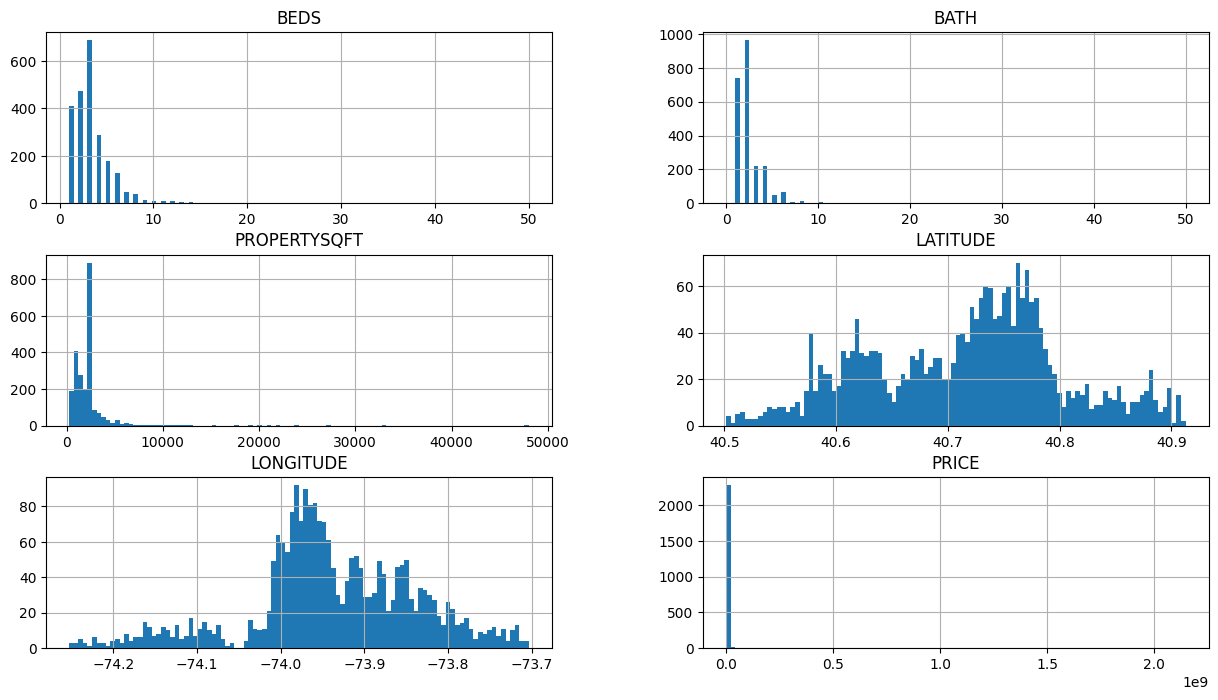

In [196]:
# rozkład zmiennych numerycznych 
df_learning.hist(bins=100, figsize=(15,8))

array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

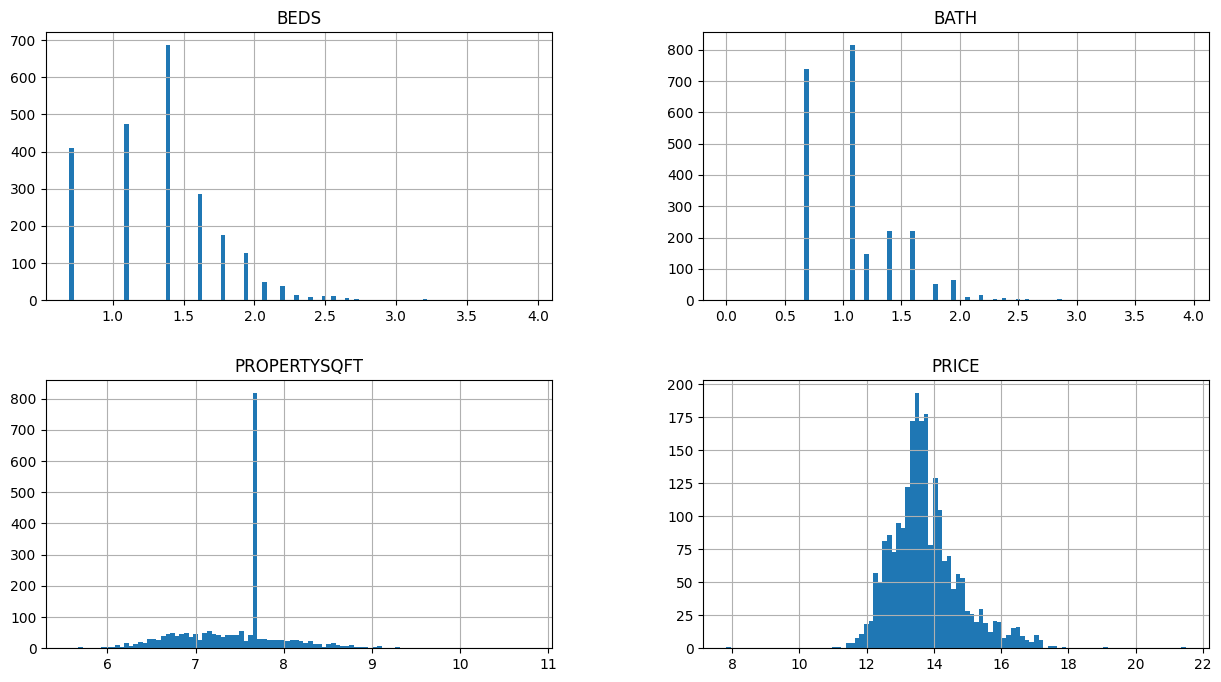

In [197]:
# sprawdzmy rozkłady najważniejszych dla nas zmiennych numerycznych, z przeskalowaniem logarytmicznym (naturalnym zwiększonym o 1)
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

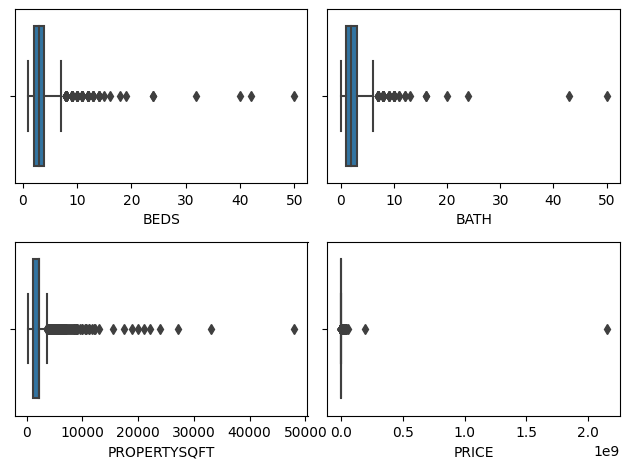

In [198]:
# analiza jako boxploty
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    #sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    sns.boxplot(df_num, x= df_num[col], ax= axes[i])
plt.tight_layout() 
plt.show()

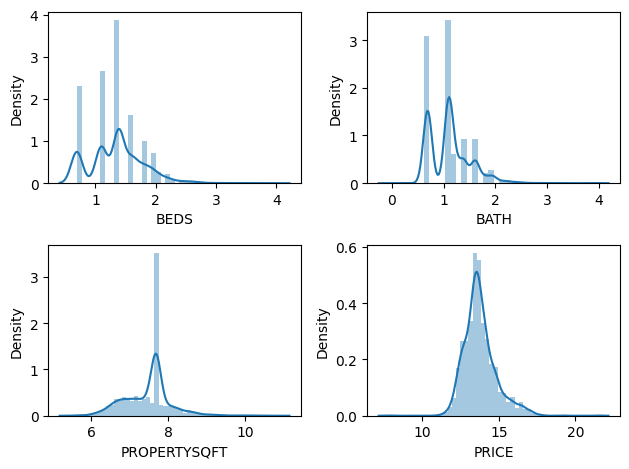

In [199]:
# jako gęstości
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.distplot(np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

In [200]:
# usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 sigm)
print(f'Przed: { df_learning.shape[0]}')
df_learning['Price_log'] = np.log1p(df_learning['PRICE'])
mean_pr = df_learning['Price_log'].mean()
std_pr = df_learning['Price_log'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_learning = df_learning[(df_learning['Price_log'] >= lower) & (df_learning['Price_log'] <= upper)]
print(f'Po: { df_learning.shape[0]}')

Przed: 2308
Po: 2282


In [201]:
#usuwamy outliery ze zmiennych BEDS i BATH
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BEDS'].quantile(0.95)
lower_lim = df_learning['BEDS'].quantile(0.05)
df_learning = df_learning[(df_learning['BEDS'] <= upper_lim) & (df_learning['BEDS'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2282
Wyjściowy rozmiar:  2187


In [202]:
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BATH'].quantile(0.95)
lower_lim = df_learning['BATH'].quantile(0.05)
df_learning = df_learning[(df_learning['BATH'] <= upper_lim) & (df_learning['BATH'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2187
Wyjściowy rozmiar:  2095


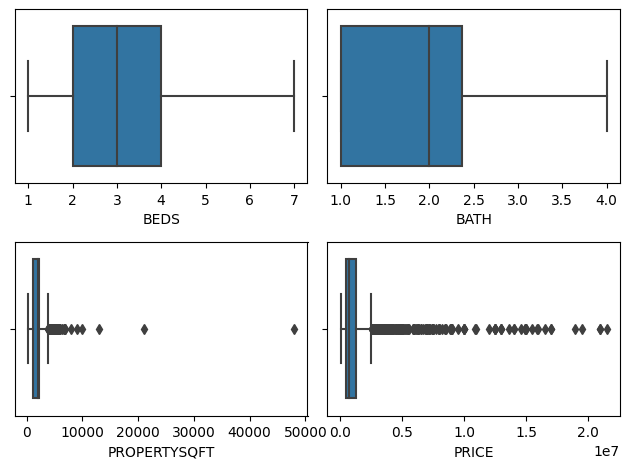

In [203]:
# Dane po usunięciu outlierów
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= (df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

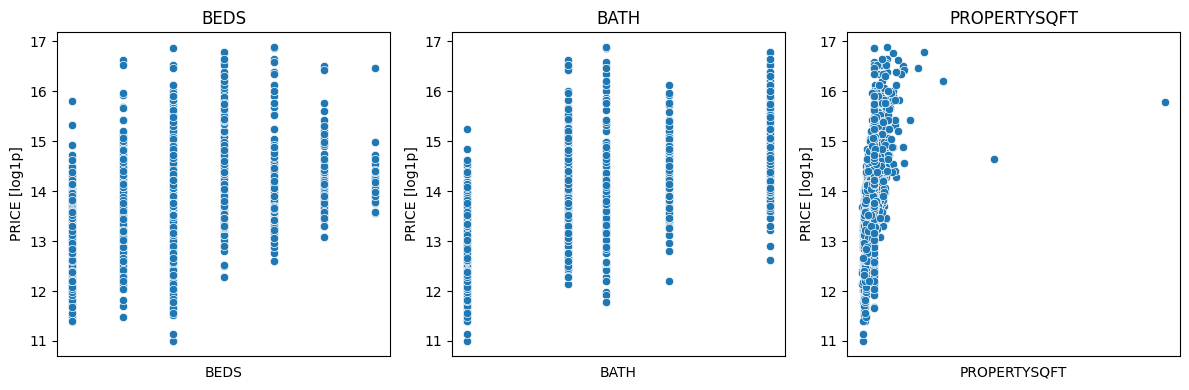

In [204]:
#Florini opisz pls
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log1p(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log1p]")

plt.tight_layout()
plt.show()

In [205]:
# TO mi nie działa idk co tam jest
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()

'from mpl_toolkits.basemap import Basemap\n\nplt.figure(figsize=(12, 7))\nm = Basemap(projection=\'merc\', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution=\'h\')\n\nm.drawcoastlines()\nm.drawcountries()\nx, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)\n\nsns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")\n\nplt.legend(title= "PRICE [log1p]")\nplt.show()'

<AxesSubplot: >

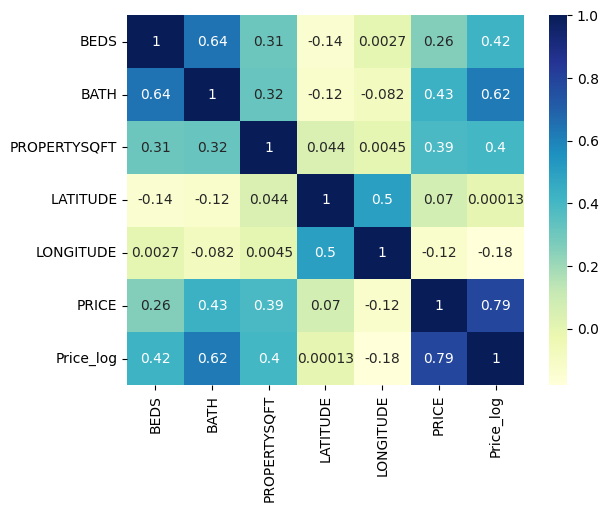

In [206]:
# korelacja danych numerycznych
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

In [207]:
cat_col = [col for col in df_learning.columns if df_learning[col].dtype == 'object']
df_learning[cat_col].nunique()
# widać ze kolumny Address, Main_Address, Long_Name i Formatted_Address mają bardzo dużo unikalnych obserwacji, co przy zmiennych kategorycznych
# moze nie działać najlepiej na model = pomijalne


BROKERTITLE                     672
TYPE                             11
ADDRESS                        2095
STATE                           264
MAIN_ADDRESS                   2095
ADMINISTRATIVE_AREA_LEVEL_2      17
LOCALITY                         10
SUBLOCALITY                      15
STREET_NAME                     137
LONG_NAME                      1543
FORMATTED_ADDRESS              2085
dtype: int64

In [208]:
df_learning = df_learning.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis = 1)

In [209]:
#sprawdzamy rozkład wartości w zmiennych kategorycznych
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                                   208
Brokered by Douglas Elliman - 575 Madison Ave          50
Brokered by Brown Harris Stevens                       41
Brokered by RE MAX Edge                                35
Brokered by Corcoran East Side                         35
                                                     ... 
Brokered by Fillmore Real Estate Fusion Team, INC.      1
Brokered by True North Realty Luxury Homes              1
Brokered by All Star Real Estate                        1
Brokered by Great Success Realty Inc                    1
Brokered by NEXT - NextStopNY                           1
Name: BROKERTITLE, Length: 672, dtype: int64

________________________________________________________________
Co-op for sale                684
House for sale                458
Condo for sale                435
Multi-family home for sale    236
Pending                       113
Townhouse for sale             97
Contingent                     42
Land for sale

In [210]:
# Brokers
sum(df_learning['BROKERTITLE'].value_counts() == 1)
# mamy az 471 brokerów którzy występują raz, zamieńmy je na others

389

In [211]:
df_learning['BROKERTITLE'] = df_learning['BROKERTITLE'].map(lambda x: 'Others' if df_learning['BROKERTITLE'].value_counts()[x] == 1 else x)
df_learning['BROKERTITLE'].value_counts()

Others                                               389
Brokered by COMPASS                                  208
Brokered by Douglas Elliman - 575 Madison Ave         50
Brokered by Brown Harris Stevens                      41
Brokered by Corcoran East Side                        35
                                                    ... 
Brokered by RE MAX City Square                         2
Brokered by VYLLA Homes                                2
Brokered by TDMT - The Development Marketing Team      2
Brokered by Today Realty Corp.                         2
Brokered by R Jaundoo Realty Llc                       2
Name: BROKERTITLE, Length: 284, dtype: int64

In [212]:
# to samo, ale plus MEAN_PRICE dla kazdej kategorii
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    df_tmp = pd.merge(df_tmp, df_count, on= col).sort_values("MEAN_PRICE", ascending=False).reset_index(drop= True)
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                           BROKERTITLE    MEAN_PRICE  count
0          Brokered by Garfield, Leslie J. & Co., Inc.  7.222500e+06      4
1                         Brokered by Engel & V�������  5.962500e+06      2
2         Brokered by Douglas Elliman - 690 Washington  5.147500e+06      2
3    Brokered by Sotheby's International Realty - E...  5.141842e+06     19
4                                  Brokered by Serhant  4.326956e+06     23
..                                                 ...           ...    ...
279  Brokered by Berkshire Hathaway HomeServices Ne...  2.370000e+05      2
280                     Brokered by Joachim Realty Llc  2.324995e+05      2
281                   Brokered by R Jaundoo Realty Llc  2.165000e+05      2
282         Brokered by John Edwards Real Estate, Inc.  1.970000e+05      2
283                   Brokered by Robert E. Hill, Inc.  1.835030e+05      3

[284 rows x 3 columns]
________________________________________________________________

In [213]:
# Podział zmiennej docelowej ciągłej na kategorie
# mogą być błędy juz w dół
quantiles = df_learning['PRICE'].quantile([0.25, 0.5, 0.75])

df_learning['PRICE_Category'] = pd.cut(df_learning['PRICE'], bins=[-float('inf'), quantiles[0.25], quantiles[0.5], quantiles[0.75], float('inf')], labels=['Cheap', 'Mid-cheap', 'Mid-expensive', 'Expensive'])
df_learning = df_learning.drop(['PRICE', 'Price_log', 'LATITUDE', 'LONGITUDE'], axis = 1)
df_learning

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,PRICE_Category
254,Brokered by Brown Harris Stevens - 129 Montagu...,Condo for sale,2,1.000000,850.000000,"Brooklyn, NY 11216",New York,Kings County,Brooklyn,Bedford-Stuyvesant,Mid-expensive
228,Brokered by Staten Island Premiere Properties,Multi-family home for sale,4,4.000000,2776.000000,"Staten Island, NY 10312",United States,New York,Richmond County,Staten Island,Expensive
2202,Brokered by CENTURY 21 Achievers,Multi-family home for sale,5,2.000000,2184.207862,"Brooklyn, NY 11226",United States,New York,Kings County,Brooklyn,Mid-expensive
2771,Brokered by COMPASS,Townhouse for sale,7,4.000000,5200.000000,"Manhattan, NY 10035",United States,New York,New York County,New York,Expensive
1133,Brokered by Cross Country Realty,Multi-family home for sale,4,3.000000,2184.207862,"Brooklyn, NY 11236",United States,New York,Kings County,Brooklyn,Mid-expensive
...,...,...,...,...,...,...,...,...,...,...,...
898,Others,Co-op for sale,1,1.000000,2184.207862,"Whitestone, NY 11357",United States,New York,Queens County,Queens,Cheap
919,Brokered by Corcoran Park Slope,House for sale,3,2.373861,2184.207862,"Brooklyn, NY 11215",United States,New York,Kings County,Brooklyn,Expensive
1164,Brokered by COMPASS,Co-op for sale,3,2.000000,2184.207862,"Queens, NY 11372",New York,Queens County,Queens,Jackson Heights,Mid-expensive
500,Brokered by Better Homes and Gardens Real Esta...,Contingent,3,2.000000,1242.000000,"Staten Island, NY 10305",United States,New York,Richmond County,Staten Island,Mid-cheap


In [214]:
# podział na zbiór do nauki i zbiór docelowy
X = df_learning.drop('PRICE_Category', axis = 1)
y = df_learning['PRICE_Category']

In [215]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#encoding zmiennych kategorycznych
onehot_encoder = OneHotEncoder()
to_encode = ['BROKERTITLE',	'TYPE',	'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2',	'LOCALITY',	'SUBLOCALITY',	'STREET_NAME']
column_transformer = ColumnTransformer(
    [('onehot_encoder', onehot_encoder, to_encode)],
    remainder='passthrough'  
)
X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state= 42)

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# porównanie kilku modeli i ich skuteczności, ale trzeba pozmieniać bo nie oddaje lekko ponad 60%

In [217]:
model = LogisticRegression()
model.fit(X=X_train, y= y_train)
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
class_report = classification_report(y_test, y_predicted)
print(class_report)

0.5918854415274463
               precision    recall  f1-score   support

        Cheap       0.82      0.68      0.75       120
    Expensive       0.69      0.73      0.71       108
    Mid-cheap       0.42      0.56      0.48        87
Mid-expensive       0.44      0.37      0.40       104

     accuracy                           0.59       419
    macro avg       0.59      0.59      0.58       419
 weighted avg       0.61      0.59      0.59       419



In [218]:
model1 = DecisionTreeClassifier()
model1.fit(X=X_train, y= y_train)
y_predicted1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_predicted1)
display(accuracy1)
class_report1 = classification_report(y_test, y_predicted1)
print(class_report1)

0.60381861575179

               precision    recall  f1-score   support

        Cheap       0.82      0.75      0.78       120
    Expensive       0.73      0.67      0.70       108
    Mid-cheap       0.42      0.55      0.48        87
Mid-expensive       0.45      0.41      0.43       104

     accuracy                           0.60       419
    macro avg       0.60      0.60      0.60       419
 weighted avg       0.62      0.60      0.61       419



In [219]:
model2 = GradientBoostingClassifier()
model2.fit(X=X_train, y= y_train)
y_predicted2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predicted2)
display(accuracy2)
class_report2 = classification_report(y_test, y_predicted2)
print(class_report2)

0.649164677804296

               precision    recall  f1-score   support

        Cheap       0.86      0.79      0.82       120
    Expensive       0.78      0.75      0.76       108
    Mid-cheap       0.42      0.59      0.49        87
Mid-expensive       0.55      0.43      0.48       104

     accuracy                           0.65       419
    macro avg       0.65      0.64      0.64       419
 weighted avg       0.67      0.65      0.65       419



In [220]:
model3 = SVC()
model3.fit(X=X_train, y= y_train)
y_predicted3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predicted2)
display(accuracy3)
class_report3 = classification_report(y_test, y_predicted3)
print(class_report3)

0.649164677804296

               precision    recall  f1-score   support

        Cheap       0.65      0.42      0.51       120
    Expensive       0.73      0.34      0.47       108
    Mid-cheap       0.28      0.32      0.30        87
Mid-expensive       0.32      0.58      0.41       104

     accuracy                           0.42       419
    macro avg       0.49      0.42      0.42       419
 weighted avg       0.51      0.42      0.43       419

